In [1]:
import matplotlib.pyplot as plt
import glacierml as gl
import tensorflow as tf
import pandas as pd
import numpy as np
from tqdm import tqdm
from scipy.stats import gaussian_kde
pd.set_option('display.max_columns', None)


2023-05-23 13:34:23.954659: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-23 13:34:24.000965: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-23 13:34:24.639747: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
print(tf.__version__)

2.12.0


In [3]:
df = gl.load_notebook_data(parameterization = '4')
df['STD'] = np.sqrt(df['Weighted Deviation Uncertainty'])

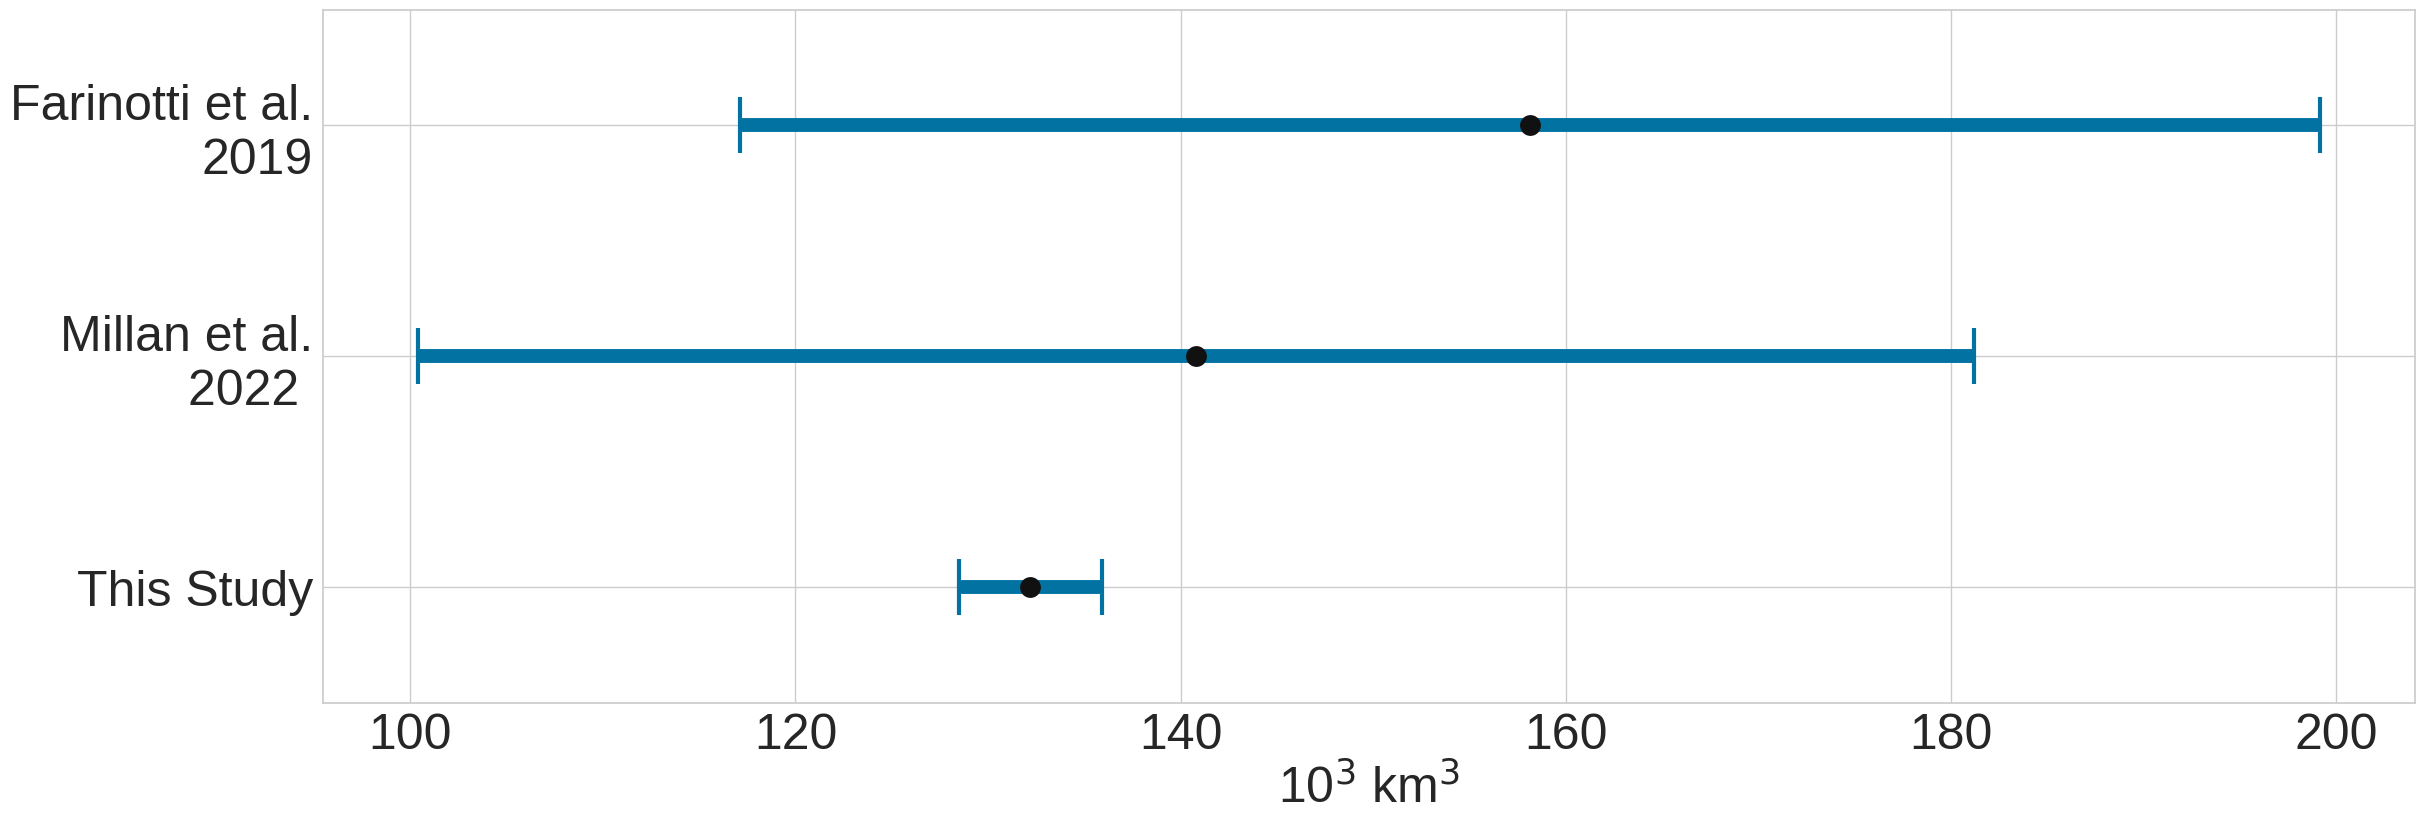

In [4]:


fig, ax = plt.subplots(1,1,figsize = (27,9))
# plt.suptitle('Global Estimates of Mountain Glacier Volume')
x = (132.193,140.8,158.17)
yr = (3.709,40.4,41.03,)

# y = (-1, 0, 1)

y = (
     f'This Study',
     f'Millan et al.\n2022 ',
     f'Farinotti et al.\n2019',
)
plt.errorbar(x, y, xerr = yr, linestyle='None', 
             marker='o', markerfacecolor = 'k', markersize = 15, 
             ecolor = 'b', color = 'k', linewidth = 10, capsize = 20.5, capthick = 3
            )
plt.tick_params(axis='y', which='major', labelsize=36)
plt.tick_params(axis='x', which='major', labelsize=36)
# ax.margins(0.1, None)
ax.set_ylim(-0.5, 2.5)
plt.xlabel('10$^3$ km$^3$', fontsize = 36)
plt.grid(visible = True, axis = 'both')
plt.show()
# plt.savefig('figs/err_bars/global_df8.svg')
# plt.savefig('figs/err_bars/global_df8.eps')
# plt.savefig('figs/err_bars/global_df8.png')

In [11]:
df = gl.load_notebook_data(parameterization = '4')
df['Test4'] =  (
    df['Weighted Deviation Uncertainty']
) / (sum(df['Weighted Deviation Uncertainty'])) * 100

df = df.sort_values('Test4', ascending = False)
df

,RGIId,Mean Thickness,Median Thickness,Thickness Std Dev,Weighted Mean Thickness,Residual Correction,Residual Variance,Bootstrap Uncertainty,Composite Deviation Uncertainty,Composite Deviation Uncertainty 3,Composite Deviation Uncertainty 20,Composite Deviation Uncertainty 40,Composite Deviation Uncertainty 60,Composite Deviation Uncertainty 80,Weighted Deviation Uncertainty,MAE Uncertainty,Weighted Volume (km3),Lower Bound,Upper Bound,Shapiro-Wilk statistic,Shapiro-Wilk p_value,IQR,Total estimates,region,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Farinotti Mean Thickness,Farinotti Shapiro-Wilk statistic,Farinotti Shapiro-Wilk p_value,Farinotti Median Thickness,Farinotti Thickness STD,Farinotti Skew,Farinotti Volume (km3),Test4
13630,RGI60-01.13635,818.382263,852.223572,179.297256,814.722639,-332.045841,1.435496,1.414898,651.564403,31243.694397,3309.061733,1707.075810,1136.975239,851.968001,109256.831800,266.375041,2464.629675,56.539363,108.751848,0.613654,0.0,108.124268,4025.0,01,60.461000,-142.0720,9.0,3,1525,5381,3025.115,273,196819,548.563200,0.960936,0.000000,632.761350,103.503750,0.083563,1659.466765,0.112157
13691,RGI60-01.13696,621.536011,646.551270,133.248505,618.875691,-279.296174,1.019995,0.781338,377.317768,18341.902658,1915.293517,985.568999,656.309815,491.856354,62983.385561,266.375041,2081.066056,39.766255,79.575621,0.608107,0.0,79.201965,4025.0,01,60.177000,-140.4280,10.0,6,1510,5943,3362.656,172,136989,420.776550,0.966561,0.000000,505.637150,74.196400,-0.131112,1414.926791,0.064655
71503,RGI60-05.13575,589.870422,612.180481,122.751099,587.426940,-268.882997,0.945057,0.628885,340.578967,16624.278020,1726.556140,888.278810,591.265685,443.237212,56716.207090,266.375041,2490.588014,28.190845,67.597083,0.550302,0.0,63.932495,4025.0,05,69.553200,-26.0253,6.8,69,1574,2506,4239.826,76,118971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.058222
14438,RGI60-01.14443,583.272339,606.297791,125.011475,580.763914,-266.196704,0.928140,0.694299,332.188462,16113.627908,1686.527116,867.744201,577.944318,433.123825,55469.254922,266.375041,1646.171250,39.512715,75.086630,0.618929,0.0,75.730835,4025.0,01,60.427000,-139.5010,12.0,0,1911,5889,2834.493,151,131321,316.248540,0.908655,0.000000,246.697500,74.597800,0.601049,896.404273,0.056942
71429,RGI60-05.13501,547.653015,567.994934,114.365875,545.380990,-253.669945,0.842382,0.559956,293.626078,14300.387044,1486.499189,764.809822,509.337808,381.724100,48886.553973,266.375041,2006.461571,31.397349,65.930437,0.576983,0.0,63.933044,4025.0,05,69.566500,-27.3418,4.5,91,2078,2850,3679.009,358,112829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192981,RGI60-16.01622,16.274967,15.285763,8.350163,16.388613,25.483459,0.008483,0.003478,0.250384,14.411462,1.258924,0.606496,0.407694,0.303048,45.239573,266.375041,0.000508,5.669423,3.833125,0.759115,0.0,6.220321,4025.0,16,0.404851,29.8882,35.5,4528,4646,4688,0.031,274,178,13.264957,0.956578,0.063918,14.200008,0.600321,-0.623112,0.000411,0.000046
208565,RGI60-17.14262,16.330698,14.831653,9.585018,16.404392,25.520773,0.008472,0.005389,0.251199,14.594125,1.189662,0.597662,0.410958,0.307538,45.170929,266.375041,0.000213,7.796648,6.557122,0.866808,0.0,9.637675,4025.0,17,-32.488400,-70.0719,45.1,4765,4832,4889,0.013,272,135,10.086395,0.915195,0.122459,10.514332,0.152497,-0.733429,0.000131,0.000046
208650,RGI60-17.14347,16.176933,14.828155,9.444370,16.257017,25.602860,0.008537,0.005068,0.245773,14.532892,1.173902,0.587221,0.402483,0.300455,44.457174,266.375041,0.000293,7.595740,6.062892,0.859014,0.0,9.041410,4025.0,17,-32.097300,-70.0246,47.0,5230,5334,5417,0.018,225,190,10.362532,0.978454,0.797623,10.512751,0.470607,-0.417636,0.000187,0.000046
208705,RGI60-17.14402,16.136982,14.721708,9.594348,16.210936,25.646545,0.008559,0.005334,0.244376,14.109446,1.157597,0.581378,0.400266,0.299845,44.179621,266.37504

In [6]:
sum(df['Test4'])

100.00000000000112

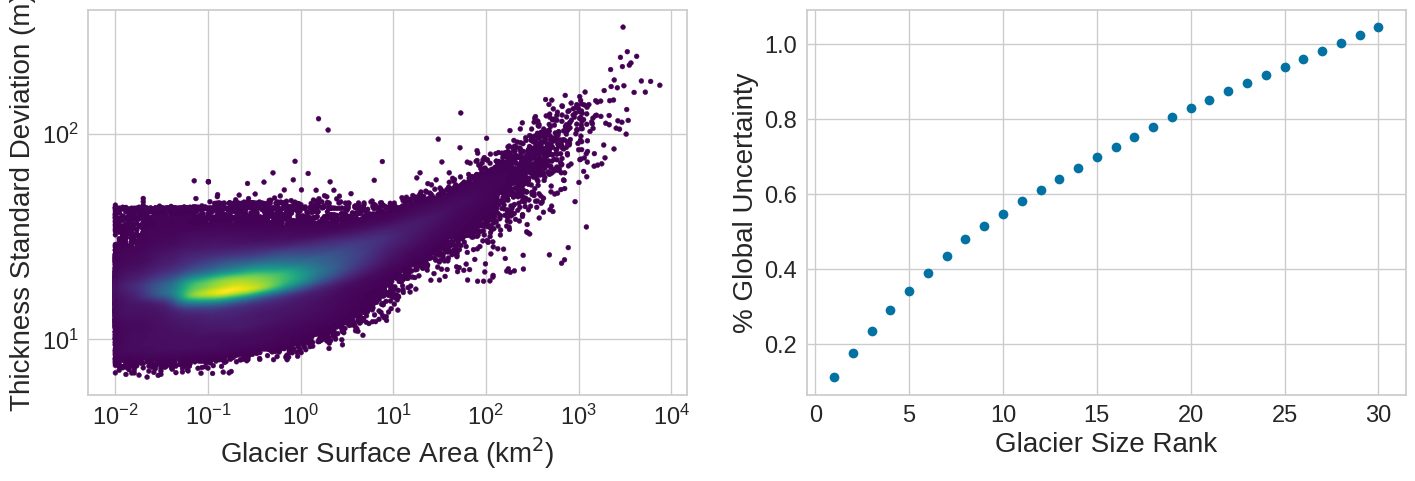

In [7]:
fig, ax = plt.subplots(1, 2, figsize = (17,5))

x = (df['Area'])
y = np.sqrt(df['Weighted Deviation Uncertainty'])

xy = np.vstack([np.log10(x),np.log10(y)])
z = gaussian_kde(xy)(xy)
ax[0].scatter(    
    x,
    y,
    marker = '.',
    c = z,
    cmap = 'viridis'
#     alpha = 0.1
#     linestyle = 'none'
)
# model = np.poly1d(np.polyfit(x, y, 2))
ax[0].set_yscale('log')
ax[0].set_xscale('log')
# ax[0].set_ylim(5,20)

# polyline = np.linspace(-5, 10, 90000)

# ax[0].plot(polyline, model(polyline), color = 'red')
# ax[0].set_title('Global Uncertainty of Individual Glaciers', fontsize = 20)
ax[0].set_ylabel('Thickness Standard Deviation (m)', fontsize = 20)
ax[0].set_xlabel('Glacier Surface Area (km$^2$)', fontsize = 20)
# plt.text(-37,31, 'A.', fontsize = 36)


# ax[0].set_xscale('log')
# ax[0].set_yscale('log')

# ax[0].plot(
#     x, 
#     p[1]*(x**p[0]),
#     color = 'red'
# )


x = range(1, 31, 1)
y = df['Test4'].cumsum().head(30)

ax[1].plot(
    x,
#     range(0, 25, 1),
#     df['Area'].sort_values(ascending = False).head(25),
    y,
    marker = 'o', 
    linestyle = 'none'
)
# ax[1].set_xscale('log')



model = np.poly1d(np.polyfit(x, y, 2))


polyline = np.linspace(1, 30, 50)

# ax[1].plot(polyline, model(polyline), color = 'red')

# ax[1].set_title('Global Uncertainty\nas a Function of Glacier Size Rank',
#                fontsize = 20)
ax[1].set_ylabel('% Global Uncertainty', fontsize = 20)
ax[1].set_xlabel('Glacier Size Rank', fontsize = 20)

ax[0].tick_params(axis="both", labelsize=17)
ax[1].tick_params(axis="both", labelsize=17)


# plt.text(0.5,31, 'B.', fontsize = 36)
# plt.text(1,100, 'C.', fontsize = 36)
# fig.suptitle('Error Analysis', fontsize = 30, y = .98)

# plt.tight_layout()
# plt.savefig('figs/global_error/curves.eps')
# plt.savefig('figs/global_error/curves.svg')
# plt.savefig('figs/global_error/curves.png')

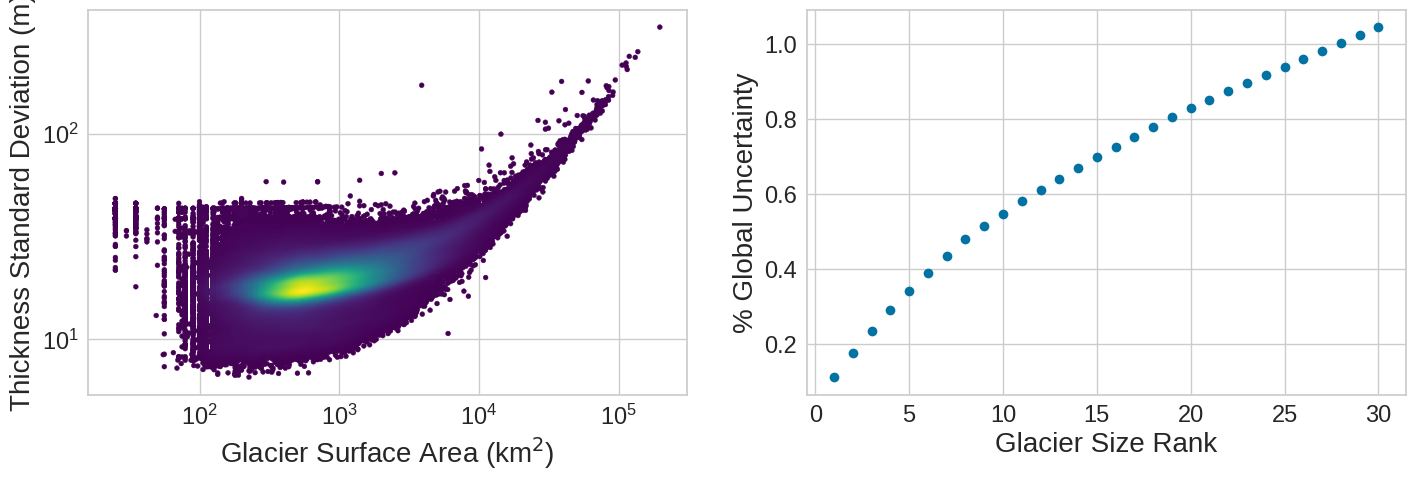

In [8]:
fig, ax = plt.subplots(1, 2, figsize = (17,5))
df = df[df['Lmax'] >= 0]
x = (df['Lmax'])
y = np.sqrt(df['Weighted Deviation Uncertainty'])

xy = np.vstack([np.log10(x),np.log10(y)])
z = gaussian_kde(xy)(xy)
ax[0].scatter(    
    x,
    y,
    marker = '.',
    c = z,
    cmap = 'viridis'
#     alpha = 0.1
#     linestyle = 'none'
)
# model = np.poly1d(np.polyfit(x, y, 2))
ax[0].set_yscale('log')
ax[0].set_xscale('log')
# ax[0].set_ylim(5,20)

# polyline = np.linspace(-5, 10, 90000)

# ax[0].plot(polyline, model(polyline), color = 'red')
# ax[0].set_title('Global Uncertainty of Individual Glaciers', fontsize = 20)
ax[0].set_ylabel('Thickness Standard Deviation (m)', fontsize = 20)
ax[0].set_xlabel('Glacier Surface Area (km$^2$)', fontsize = 20)
# plt.text(-37,31, 'A.', fontsize = 36)


# ax[0].set_xscale('log')
# ax[0].set_yscale('log')

# ax[0].plot(
#     x, 
#     p[1]*(x**p[0]),
#     color = 'red'
# )


x = range(1, 31, 1)
y = df['Test4'].cumsum().head(30)

ax[1].plot(
    x,
#     range(0, 25, 1),
#     df['Area'].sort_values(ascending = False).head(25),
    y,
    marker = 'o', 
    linestyle = 'none'
)
# ax[1].set_xscale('log')



model = np.poly1d(np.polyfit(x, y, 2))


polyline = np.linspace(1, 30, 50)

# ax[1].plot(polyline, model(polyline), color = 'red')

# ax[1].set_title('Global Uncertainty\nas a Function of Glacier Size Rank',
#                fontsize = 20)
ax[1].set_ylabel('% Global Uncertainty', fontsize = 20)
ax[1].set_xlabel('Glacier Size Rank', fontsize = 20)

ax[0].tick_params(axis="both", labelsize=17)
ax[1].tick_params(axis="both", labelsize=17)


# plt.text(0.5,31, 'B.', fontsize = 36)
# plt.text(1,100, 'C.', fontsize = 36)
# fig.suptitle('Error Analysis', fontsize = 30, y = .98)

# plt.tight_layout()
# plt.savefig('figs/global_error/curves.eps')
# plt.savefig('figs/global_error/curves.svg')
# plt.savefig('figs/global_error/curves.png')

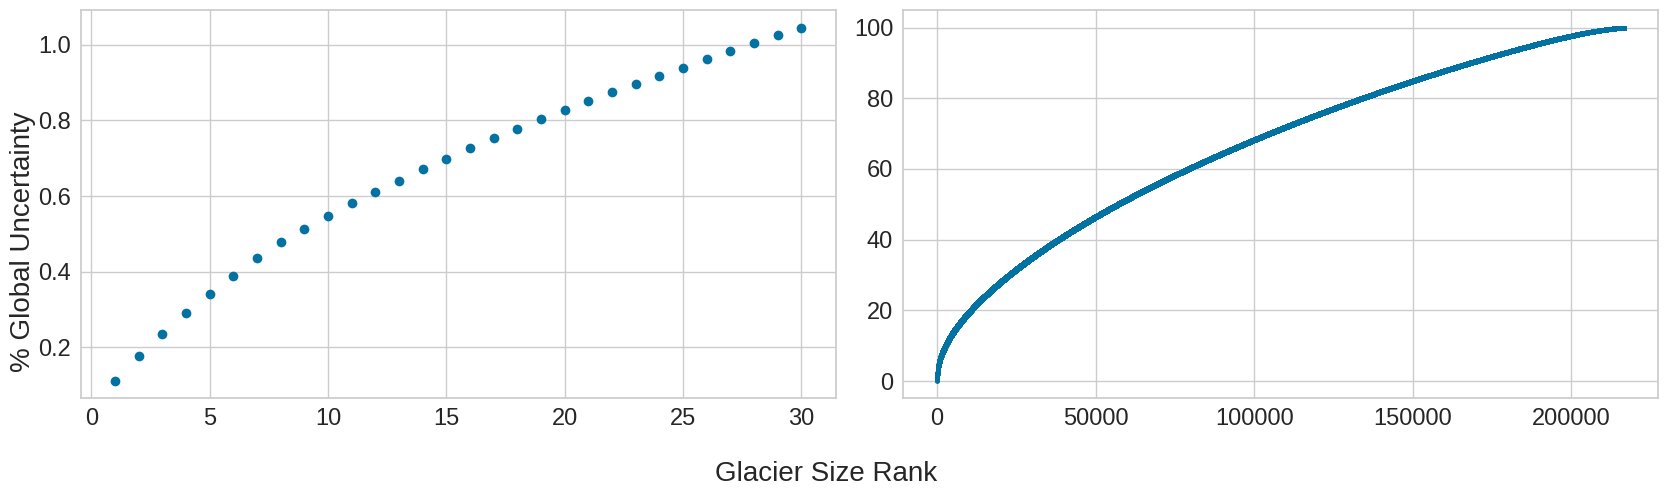

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (17,5))

x = range(1, 216502, 1)
y = df['Test4'].cumsum()

ax[1].plot(
    x,
#     range(0, 25, 1),
#     df['Area'].sort_values(ascending = False).head(25),
    y,
    marker = '.', 
    linestyle = 'none'
)

x = range(1, 31, 1)
y = df['Test4'].cumsum().head(30)

ax[0].plot(
    x,

    y,
    marker = 'o', 
    linestyle = 'none'
)
fig.supxlabel('Glacier Size Rank', fontsize = 20)
fig.supylabel('% Global Uncertainty', fontsize = 20)
# ax.set_ylabel('% Global Uncertainty', fontsize = 20)
# # ax[0].set_xlabel('Glacier Size Rank', fontsize = 20)
# ax.set_xlabel('Glacier Size Rank', fontsize = 20)

ax[0].tick_params(axis="both", labelsize=17)
ax[1].tick_params(axis="both", labelsize=17)

plt.tight_layout()